<a href="https://colab.research.google.com/github/Geolist/first-repository/blob/main/%EB%85%B8%EB%93%9C_12_%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 보스턴 집값 딥러닝

In [1]:
# 보스턴 집값 딥러닝
from keras.datasets import boston_housing
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

### 데이터 로드 및 전처리

In [2]:
# 2. Manual standardization (without sklearn)
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

### 모델 구성 및 컴파일

In [3]:
# 3. Build the model
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # 출력층: 회귀 문제이므로 1개의 뉴런

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 모델 학습

In [4]:
# 4. Train the model
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=50, batch_size=16,
                    validation_split=0.2,
                    verbose=0)

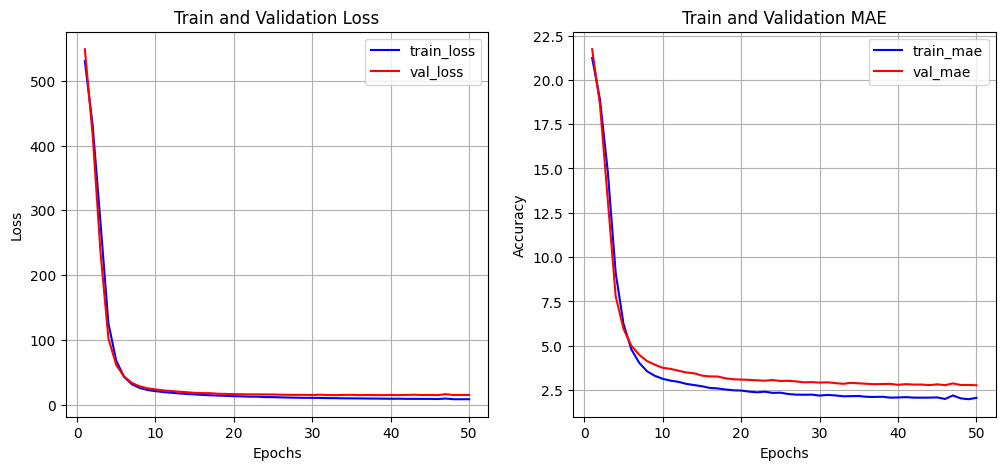

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
# plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가

In [5]:
# 5. Evaluate the model
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
mse, mae = model.evaluate(test_data, test_labels, verbose=0)
print(f"Test MAE: {mae:.3f}")

Test MAE: 3.194


## Reuters 딥러닝 모델

### 데이터 로드 및 전처리
- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

(num_words, test_size, val_ratio) = (10000, 0.25, 0.25)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_words)

# 훈련 데이터셋에서 검증용 데이터셋 분리
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=val_ratio, random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
6736
2246
2246
46


6736  # 훈련 데이터 개수

2246  # 검증 데이터 개수 (전체 훈련 데이터의 25%)

2246  # 테스트 데이터 개수 (원본에서 제공된 테스트셋)

46    # 레이블 종류 수 (0~45까지 총 46개 클래스)


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
- 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [11]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

### 모델 구성 및 컴파일
####BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [12]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))  # 클래스 수 = 46개

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,292,142 (4.93 MB)

 Trainable params: 1,291,758 (4.93 MB)

 Non-trainable params: 384 (1.50 KB)

### 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [14]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
earlystop_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2749 - loss: 3.3902

53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.2813 - loss: 3.3622 - val_accuracy: 0.6661 - val_loss: 2.6182
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6793 - loss: 1.5210

53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.6796 - loss: 1.5197 - val_accuracy: 0.6995 - val_loss: 1.9295
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7516 - loss: 1.1663

53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.7517 - loss: 1.1654 - val_accuracy: 0.7164 - val_loss: 1.5246
Epoch 4/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7932 - loss: 0.9368

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7934 - loss: 0.9363 - val_accuracy: 0.7355 - val_loss: 1.3144
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8275 - loss: 0.7632

53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8274 - loss: 0.7634 - val_accuracy: 0.7538 - val_loss: 1.1402
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8517 - loss: 0.6696

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8516 - loss: 0.6696 - val_accuracy: 0.7876 - val_loss: 1.0261
Epoch 7/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8647 - loss: 0.5887

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8645 - loss: 0.5890 - val_accuracy: 0.7988 - val_loss: 0.9740
Epoch 8/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8722 - loss: 0.5348

53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8724 - loss: 0.5343 - val_accuracy: 0.8050 - val_loss: 0.9625
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8942 - loss: 0.4523 - val_accuracy: 0.8068 - val_loss: 0.9786
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8937 - loss: 0.4276 - val_accuracy: 0.8041 - val_loss: 1.0170
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9161 - loss: 0.3524 - val_accuracy: 0.8094 - val_loss: 1.0124
Epoch 12/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9161 - loss: 0.3473 - val_accuracy: 0.8157 - val_loss: 1.0318
Epoch 13/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9288 - loss: 0.3143 - val_accuracy: 0.8103 - val_loss: 1.0622


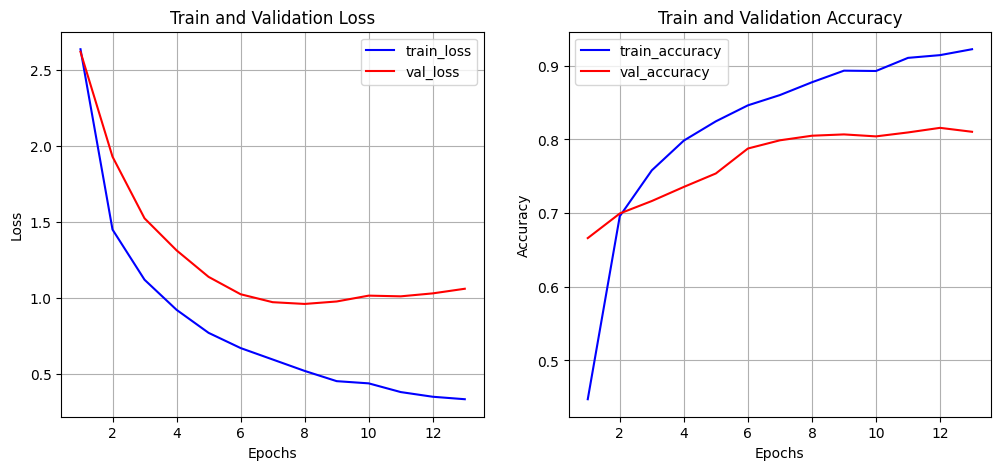

In [15]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
테스트 데이터셋을 이용해 모델을 평가합니다.

In [16]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7898 - loss: 0.9882
Test Loss: 1.0102
Test Accuracy: 0.7805


# CIFAR10 딥러닝 모델

### 데이터 로드 및 전처리
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.

- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [18]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


#### class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [19]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

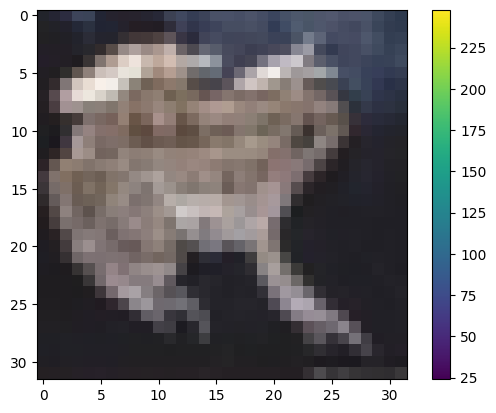

In [20]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
# plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [21]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


(40000, 32, 32, 3)  # 훈련 데이터: 32x32 RGB 이미지 4만개

(10000, 32, 32, 3)  # 검증 데이터: 1만개

(10000, 32, 32, 3)  # 테스트 데이터: 1만개


In [22]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_val = x_val.reshape(x_val.shape[0], 32 * 32 * 3)
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [23]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [24]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,710,346 (6.52 MB)

 Trainable params: 1,708,810 (6.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

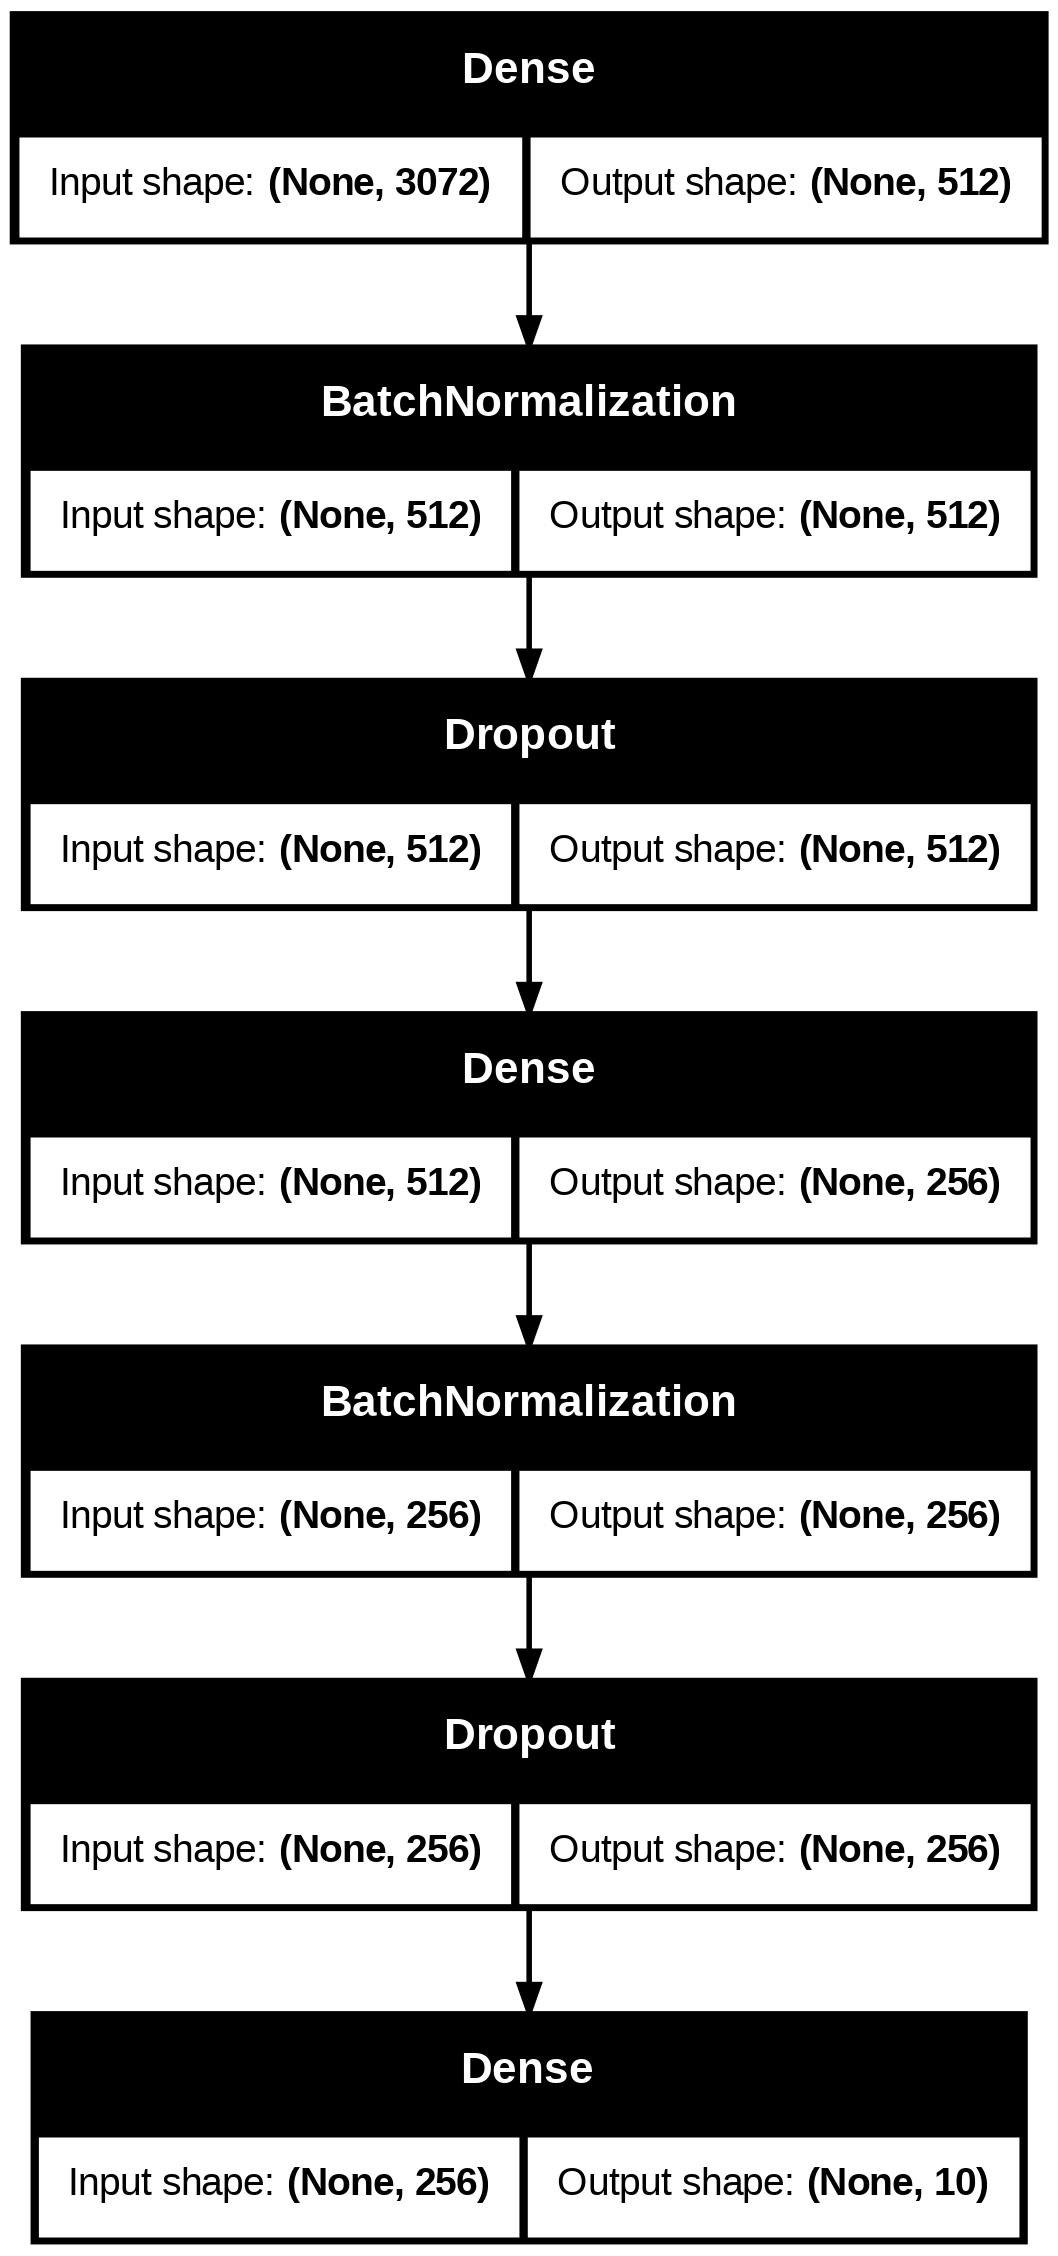

In [25]:
utils.plot_model(model, show_shapes=True)

### 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [26]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(patience=5, monitor='val_loss', mode='min', restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stop],
    verbose=2
)

Epoch 1/50


625/625 - 24s - 39ms/step - accuracy: 0.2807 - loss: 2.1774 - val_accuracy: 0.3121 - val_loss: 1.9033
Epoch 2/50


625/625 - 42s - 68ms/step - accuracy: 0.3475 - loss: 1.8323 - val_accuracy: 0.3075 - val_loss: 1.8737
Epoch 3/50


625/625 - 37s - 59ms/step - accuracy: 0.3641 - loss: 1.7808 - val_accuracy: 0.3981 - val_loss: 1.7072
Epoch 4/50


625/625 - 22s - 35ms/step - accuracy: 0.3718 - loss: 1.7651 - val_accuracy: 0.4027 - val_loss: 1.6672
Epoch 5/50
625/625 - 19s - 30ms/step - accuracy: 0.3670 - loss: 1.7687 - val_accuracy: 0.3527 - val_loss: 1.7912
Epoch 6/50


625/625 - 23s - 37ms/step - accuracy: 0.3698 - loss: 1.7582 - val_accuracy: 0.3988 - val_loss: 1.6538
Epoch 7/50


625/625 - 39s - 63ms/step - accuracy: 0.3735 - loss: 1.7539 - val_accuracy: 0.4215 - val_loss: 1.6315
Epoch 8/50
625/625 - 18s - 29ms/step - accuracy: 0.3687 - loss: 1.7554 - val_accuracy: 0.3893 - val_loss: 1.6947
Epoch 9/50


625/625 - 23s - 36ms/step - accuracy: 0.3751 - loss: 1.7477 - val_accuracy: 0.4186 - val_loss: 1.6220
Epoch 10/50


625/625 - 39s - 62ms/step - accuracy: 0.3772 - loss: 1.7351 - val_accuracy: 0.4324 - val_loss: 1.6013
Epoch 11/50
625/625 - 21s - 34ms/step - accuracy: 0.3797 - loss: 1.7265 - val_accuracy: 0.4195 - val_loss: 1.6049
Epoch 12/50


625/625 - 20s - 31ms/step - accuracy: 0.3877 - loss: 1.7096 - val_accuracy: 0.4415 - val_loss: 1.5705
Epoch 13/50
625/625 - 21s - 34ms/step - accuracy: 0.3923 - loss: 1.7065 - val_accuracy: 0.4087 - val_loss: 1.6335
Epoch 14/50
625/625 - 20s - 31ms/step - accuracy: 0.3927 - loss: 1.7010 - val_accuracy: 0.4158 - val_loss: 1.6116
Epoch 15/50


625/625 - 21s - 33ms/step - accuracy: 0.3912 - loss: 1.7007 - val_accuracy: 0.4415 - val_loss: 1.5675
Epoch 16/50
625/625 - 20s - 31ms/step - accuracy: 0.3946 - loss: 1.6997 - val_accuracy: 0.4159 - val_loss: 1.5960
Epoch 17/50


625/625 - 19s - 31ms/step - accuracy: 0.3955 - loss: 1.6933 - val_accuracy: 0.4403 - val_loss: 1.5628
Epoch 18/50
625/625 - 21s - 34ms/step - accuracy: 0.3928 - loss: 1.6962 - val_accuracy: 0.4133 - val_loss: 1.6074
Epoch 19/50
625/625 - 19s - 31ms/step - accuracy: 0.3951 - loss: 1.6978 - val_accuracy: 0.4362 - val_loss: 1.5850
Epoch 20/50
625/625 - 21s - 34ms/step - accuracy: 0.3886 - loss: 1.7003 - val_accuracy: 0.4240 - val_loss: 1.6197
Epoch 21/50
625/625 - 18s - 29ms/step - accuracy: 0.3911 - loss: 1.6969 - val_accuracy: 0.4354 - val_loss: 1.5807
Epoch 22/50
625/625 - 21s - 34ms/step - accuracy: 0.3976 - loss: 1.6916 - val_accuracy: 0.4479 - val_loss: 1.5637


### 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

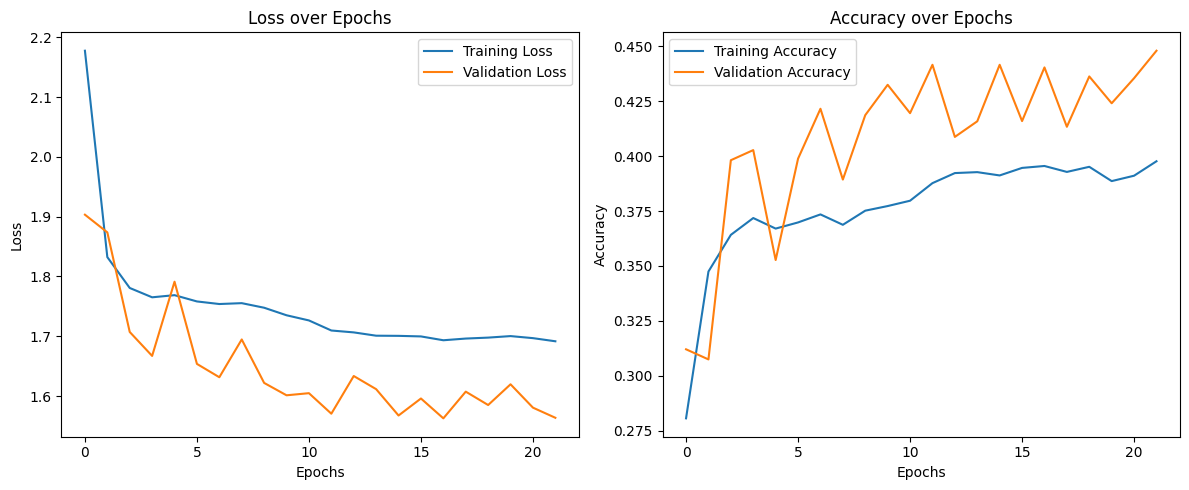

In [27]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 모델 평가 및 예측

In [28]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4514 - loss: 1.5459


[1.550216555595398, 0.4519999921321869]